In [146]:
from pyforest import *       ## import the basic libraries

 ## Function for splitting training and test set
from sklearn.model_selection import train_test_split 

##from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler  

 ##Library to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV       
from sklearn.model_selection import RandomizedSearchCV   

##importing models
from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

## Evaluation metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [147]:
##Set printing options
np.set_printoptions(precision=2, suppress=True)  

### Reading the datafile

In [148]:
data = pd.read_csv("D:\\GRE\\ML\\First 2 Case Studies\\Employee Retention\\Files\\employee_data.csv")
data.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [149]:
data.tail(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


In [150]:
data.shape

(14249, 10)

In [151]:
data.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

### Numeric data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDB67AE6A0>,
      dtype=object)

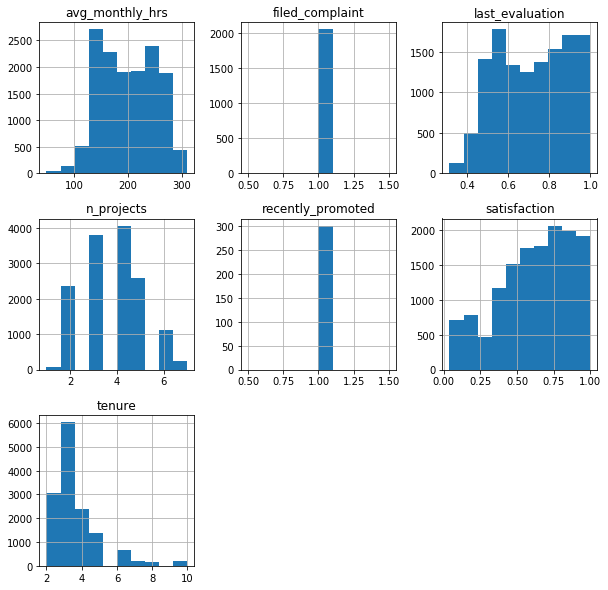

In [152]:
data.hist(figsize = (10,10) , xrot = 0)

#### Observations:
1. maximum of around 2500+ people work for 150 hours and also 2300 of them work for 250 hours.
2. 'filed_complaint' & 'recently_promoted' seem to be binary data. i.e: either '1' or '0'.
3. 'last_evaluation' ranges from 0.4 - 1.0 
4. maximum no. of projects opted are 7. maximum no. of projects taken by employees is 4.
5. most of the people are seem to be satiesfied with their job.
6. maximum tenure opted is for 10 years. Tenure for most employees is 3.

In [153]:
data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


#### Observations:

1. min & max of 'filed_complaint' is 1. Thus it can be interpreted as there is only one file complained.
2.  min & max of 'recently_promoted' is 1. Thus it can be interpreted as there is only one promotion in last 3 years.

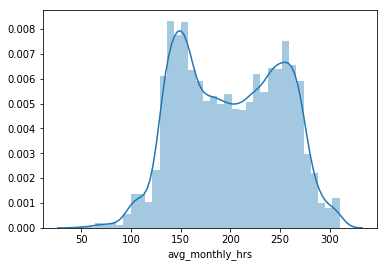

In [154]:
sns.distplot(data['avg_monthly_hrs'] , kde  = True )

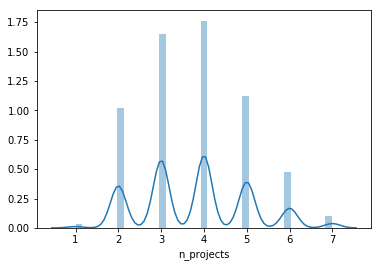

In [155]:
sns.distplot(data['n_projects'], kde = True)

### Categorical data visualization

In [156]:
data.describe(include = ['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


In [157]:
data['department'].value_counts()

sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
temp                       181
admin                      176
procurement                174
Name: department, dtype: int64

#### Observations:

1. 'IT' and 'information_technology' seems to be same departments.
2.  We must delete the employees belonging to 'temp' department as these are the employees which do not belong to any of the departments

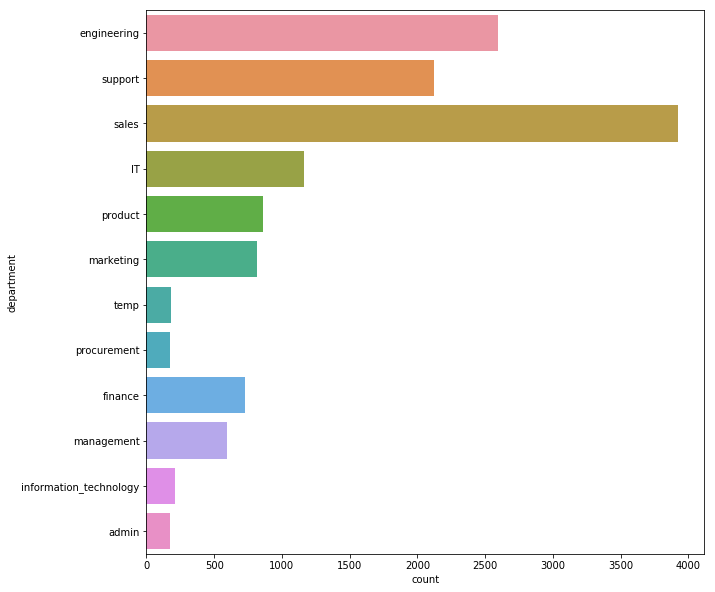

In [158]:
plt.figure( figsize = (10,10))
sns.countplot( data= data , y = 'department'  )

In [159]:
data['salary'].value_counts()

low       6952
medium    6146
high      1151
Name: salary, dtype: int64

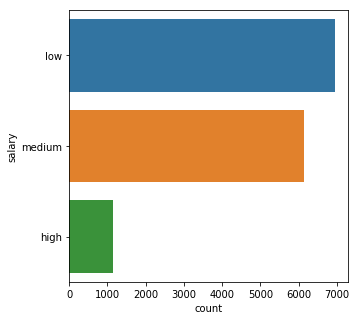

In [160]:
plt.figure(figsize = (5,5))
sns.countplot(data = data , y = 'salary' )

In [161]:
data['status'].value_counts()

Employed    10857
Left         3392
Name: status, dtype: int64

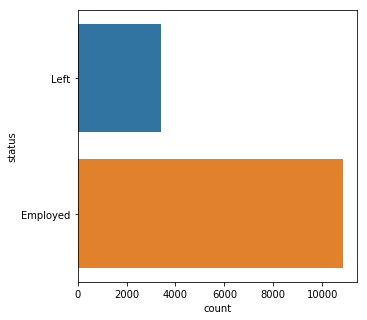

In [162]:
plt.figure(figsize = (5,5))
sns.countplot(data = data , y = 'status' )

### Segmentation:

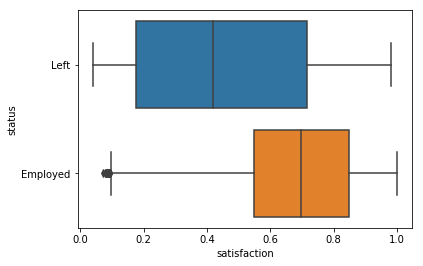

In [163]:
sns.boxplot(y = 'status' , x = 'satisfaction' , data = data )

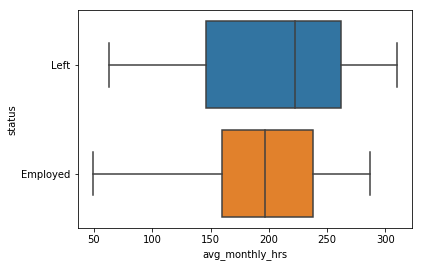

In [164]:
sns.boxplot(y = 'status' , x = 'avg_monthly_hrs' , data = data )

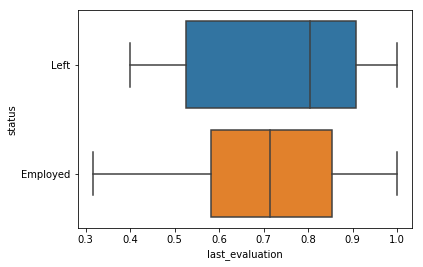

In [165]:
sns.boxplot(y = 'status' , x = 'last_evaluation' , data = data )

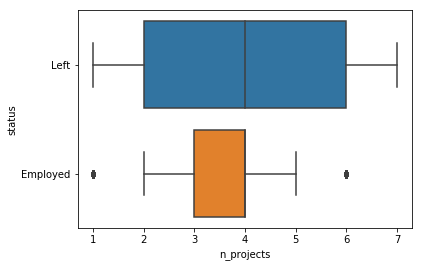

In [166]:
sns.boxplot(y = 'status' , x = 'n_projects' , data = data )

#### Observations:

1. the employees who left the company where unsatisfied as compared to those who are employed.
2. The average monthly hours of the emplyees who left was more as compared to the employees who are working in the company.
3. the employees who left had more average evaluation than employed.
4. the employees who left had more project than employed.

### Bivariate Analysis:


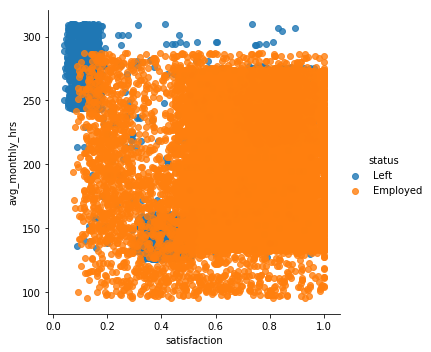

In [167]:
sns.lmplot(data = data , x = 'satisfaction' , y = 'avg_monthly_hrs' , hue = 'status' , fit_reg = False)

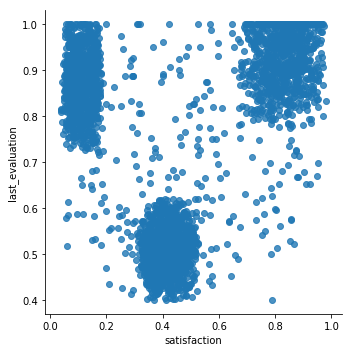

In [168]:
sns.lmplot(x='satisfaction', y='last_evaluation', data=data[data.status == 'Left'], fit_reg=False)

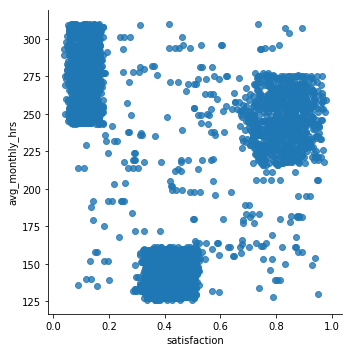

In [169]:
sns.lmplot(x='satisfaction', y='avg_monthly_hrs', data=data[data.status == 'Left'], fit_reg=False)

### Heatmap representation and feature correlation

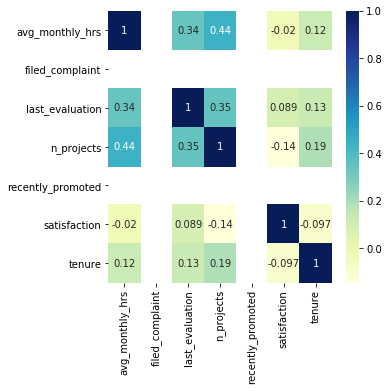

In [170]:
plt.figure(figsize = (5,5))
sns.heatmap(data.corr(), cmap = 'YlGnBu', annot = True )

### Data Cleaning:

In [171]:
data.shape  # Checking the data shape

(14249, 10)

In [172]:
# drop the duplicates in the data
data = data.drop_duplicates()  
data.shape

(14221, 10)

In [173]:
 # removing the temp record as it was asked in the project.
data = data[data.department != 'temp']   
data.shape

(14068, 10)

In [174]:
# Find the unique elements of an filed_complaint and recently_promoted.
print(data['filed_complaint'].unique())       
print(data['recently_promoted'].unique())

[nan  1.]
[nan  1.]


In [175]:
# Filling missing numerical values with zero.
data['filed_complaint'] = data.filed_complaint.fillna(0)
data['recently_promoted'] = data.recently_promoted.fillna(0)

In [176]:
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0
1,232,support,0.0,NaN,3,0.0,low,0.834544,Employed,2.0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0


In [177]:
data.tail()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14244,178,IT,0.0,0.735865,5,0.0,low,0.263282,Employed,5.0
14245,257,sales,0.0,0.638604,3,0.0,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,0.0,medium,0.898917,Left,5.0
14247,130,IT,0.0,0.757184,4,0.0,medium,0.641304,Employed,3.0
14248,159,NaN,0.0,0.578742,3,0.0,medium,0.808850,Employed,3.0


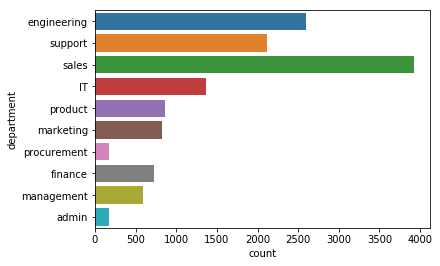

In [178]:
# updated graph
data.department.replace("information_technology" , "IT" , inplace = True)
sns.countplot( y = 'department' , data = data)

In [179]:
# re-checking the features
data.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [180]:
# filling the missing categorical values as 'missing'
data['department'].fillna("missing" , inplace = True)

In [181]:
# creating a new feature for handling the missing data in 'last_evaluation' 
data['missing_last_evaluation'] = data.last_evaluation.isnull().astype(int)

In [182]:
data.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,missing_last_evaluation
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0
1,232,support,0.0,NaN,3,0.0,low,0.834544,Employed,2.0,1
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0
5,140,sales,0.0,0.589097,4,0.0,medium,0.660020,Employed,4.0,0
6,121,sales,1.0,0.625399,3,0.0,low,0.835571,Employed,3.0,0
7,150,engineering,0.0,0.644586,4,0.0,low,0.796683,Employed,3.0,0
8,215,engineering,1.0,0.524114,3,0.0,medium,0.715005,Employed,7.0,0
9,269,support,0.0,0.909364,5,0.0,medium,0.994037,Employed,2.0,0


In [183]:
# now replacing the missing data of 'NAN' last_evaluation with '0'
data.last_evaluation.fillna(0 , inplace = True)

In [184]:
data.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,missing_last_evaluation
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0
1,232,support,0.0,0.000000,3,0.0,low,0.834544,Employed,2.0,1
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0
5,140,sales,0.0,0.589097,4,0.0,medium,0.660020,Employed,4.0,0
6,121,sales,1.0,0.625399,3,0.0,low,0.835571,Employed,3.0,0
7,150,engineering,0.0,0.644586,4,0.0,low,0.796683,Employed,3.0,0
8,215,engineering,1.0,0.524114,3,0.0,medium,0.715005,Employed,7.0,0
9,269,support,0.0,0.909364,5,0.0,medium,0.994037,Employed,2.0,0


In [185]:
# re-checking for missing data
data.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
missing_last_evaluation    0
dtype: int64

### Feature Engineering

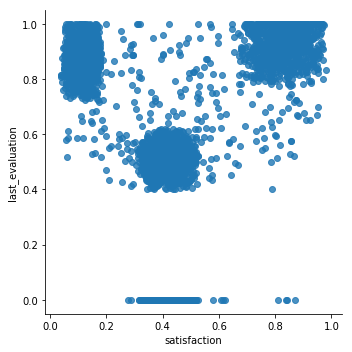

In [186]:
sns.lmplot(y = 'last_evaluation' , x = 'satisfaction' , data = data[data.status == 'Left' ] , fit_reg = False)


That looks different from the one we plotted previously.

* It's because we just flagged and filled missing values for 'last_evaluation' with 0.

In [187]:
# adding new features
data['underperformer'] = ((data.last_evaluation < 0.6) & (data.missing_last_evaluation == 0)).astype(int)

data['unhappy'] = (data.satisfaction < 0.2).astype(int)

data['overachiever'] = ((data.last_evaluation > 0.8) & (data.satisfaction > 0.7)).astype(int)

In [188]:
data.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,missing_last_evaluation,underperformer,unhappy,overachiever
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0,0,0,1
1,232,support,0.0,0.000000,3,0.0,low,0.834544,Employed,2.0,1,0,0,0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,0,0,0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0,1,0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0,0,0,1
5,140,sales,0.0,0.589097,4,0.0,medium,0.660020,Employed,4.0,0,1,0,0
6,121,sales,1.0,0.625399,3,0.0,low,0.835571,Employed,3.0,0,0,0,0
7,150,engineering,0.0,0.644586,4,0.0,low,0.796683,Employed,3.0,0,0,0,0
8,215,engineering,1.0,0.524114,3,0.0,medium,0.715005,Employed,7.0,0,1,0,0
9,269,support,0.0,0.909364,5,0.0,medium,0.994037,Employed,2.0,0,0,0,1


## Converting categorical ordinal features into numerical features

In [189]:
# Convert status to an indicator variable : the reson for this step is Regression analysis requires numerical variables. 
#So, when a researcher wishes to include a categorical variable in a regression model, supplementary steps are required to make the results interpretable. 
#In these steps, the categorical variables are recoded into a set of separate binary variables
data['status'] = pd.get_dummies( data.status ).Left

In [190]:
data.status.mean()

0.23933750355416547

similar to the one which we encountered above which is  ~28%.

In [191]:
data.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,missing_last_evaluation,underperformer,unhappy,overachiever
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,1,5.0,0,0,0,1
1,232,support,0.0,0.000000,3,0.0,low,0.834544,0,2.0,1,0,0,0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,0,3.0,0,0,0,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,0,2.0,0,1,0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,0,3.0,0,0,0,1
5,140,sales,0.0,0.589097,4,0.0,medium,0.660020,0,4.0,0,1,0,0
6,121,sales,1.0,0.625399,3,0.0,low,0.835571,0,3.0,0,0,0,0
7,150,engineering,0.0,0.644586,4,0.0,low,0.796683,0,3.0,0,0,0,0
8,215,engineering,1.0,0.524114,3,0.0,medium,0.715005,0,7.0,0,1,0,0
9,269,support,0.0,0.909364,5,0.0,medium,0.994037,0,2.0,0,0,0,1


### Converting the categorical nominal features into numerical features

In [192]:
data = pd.get_dummies(data, columns = ['department' , 'salary'])

In [193]:
data.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,missing_last_evaluation,underperformer,...,department_management,department_marketing,department_missing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,1,...,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [194]:
# saving the datafile into csv format.
data.to_csv('C:\\Users\\ajays\\ml(practise)\\EM_R_updated_table.csv' , index = None)

## Data preparation:

In [195]:
data.shape

(14068, 26)

In [196]:
y = data.status
x = data.drop('status' , axis = 1)

In [197]:
## stratify:  to ensure that the train and test sets have approximately 
##the same percentage of samples of each target class as the complete set.
x_train ,  x_test ,y_train , y_test = train_test_split(x, y , test_size = 0.2 , stratify = data.status , random_state =1234)

In [198]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((11254, 25), (11254,), (2814, 25), (2814,))

### Data Standardization (using Z-Score method)

In [199]:
train_mean = x_train.mean()
train_std = x_train.std()

In [200]:
x_train = (x_train - train_mean)/ train_std

In [201]:
x_train.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,missing_last_evaluation,underperformer,unhappy,...,department_management,department_marketing,department_missing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
count,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,...,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04
mean,-1.410518e-16,-7.124507e-16,4.897691e-15,3.868467e-16,-1.181962e-15,-8.726773e-15,-2.701076e-16,3.084238e-16,-4.519616e-16,3.725965e-16,...,-1.424995e-15,-7.675820e-16,1.635147e-16,4.087597e-16,-4.383181e-16,1.926662e-16,1.515897e-15,-5.810174e-16,9.154851e-18,-6.200241e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.097551e+00,-4.066418e-01,-2.417939e+00,-1.455347e+00,-1.457128e-01,-2.327064e+00,-1.024920e+00,-3.267968e-01,-6.344341e-01,-3.151772e-01,...,-2.160667e-01,-2.467631e-01,-2.316072e-01,-1.110062e-01,-2.543731e-01,-6.223287e-01,-4.182927e-01,-2.983599e-01,-9.767671e-01,-8.684807e-01
25%,-9.142094e-01,-4.066418e-01,-4.586632e-01,-6.436473e-01,-1.457128e-01,-6.841787e-01,-3.396507e-01,-3.267968e-01,-6.344341e-01,-3.151772e-01,...,-2.160667e-01,-2.467631e-01,-2.316072e-01,-1.110062e-01,-2.543731e-01,-6.223287e-01,-4.182927e-01,-2.983599e-01,-9.767671e-01,-8.684807e-01
50%,-3.171743e-02,-4.066418e-01,1.388747e-01,1.680522e-01,-1.457128e-01,1.210881e-01,-3.396507e-01,-3.267968e-01,-6.344341e-01,-3.151772e-01,...,-2.160667e-01,-2.467631e-01,-2.316072e-01,-1.110062e-01,-2.543731e-01,-6.223287e-01,-4.182927e-01,-2.983599e-01,-9.767671e-01,-8.684807e-01
75%,8.908879e-01,-4.066418e-01,7.816106e-01,9.797517e-01,-1.457128e-01,8.126088e-01,3.456181e-01,-3.267968e-01,1.576068e+00,-3.151772e-01,...,-2.160667e-01,-2.467631e-01,-2.316072e-01,-1.110062e-01,-2.543731e-01,1.606725e+00,-4.182927e-01,-2.983599e-01,1.023695e+00,1.151334e+00
max,2.194569e+00,2.458948e+00,1.311132e+00,2.603151e+00,6.862203e+00,1.518713e+00,4.457231e+00,3.059733e+00,1.576068e+00,3.172536e+00,...,4.627788e+00,4.052110e+00,4.317271e+00,9.007706e+00,3.930883e+00,1.606725e+00,2.390458e+00,3.351360e+00,1.023695e+00,1.151334e+00


In [202]:
x_test = (x_test - train_mean)/train_std

In [203]:
x_test.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,missing_last_evaluation,underperformer,unhappy,...,department_management,department_marketing,department_missing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
count,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,...,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000
mean,0.050369,0.029205,0.020064,0.032769,0.018652,0.007616,0.005419,-0.007881,-0.019358,0.031859,...,-0.055982,0.017524,-0.011761,0.008892,0.007391,-0.003675,0.026875,-0.010429,0.001426,0.004332
std,1.009275,1.029258,0.999263,1.016184,1.060773,1.017268,1.005757,0.989272,0.990786,1.044182,...,0.866064,1.032797,0.975736,1.038904,1.013605,0.998316,1.025946,0.984026,1.000166,1.000736
min,-2.077494,-0.406642,-2.417939,-1.455347,-0.145713,-2.326534,-1.024920,-0.326797,-0.634434,-0.315177,...,-0.216067,-0.246763,-0.231607,-0.111006,-0.254373,-0.622329,-0.418293,-0.298360,-0.976767,-0.868481
25%,-0.854040,-0.406642,-0.447861,-0.643647,-0.145713,-0.671221,-0.339651,-0.326797,-0.634434,-0.315177,...,-0.216067,-0.246763,-0.231607,-0.111006,-0.254373,-0.622329,-0.418293,-0.298360,-0.976767,-0.868481
50%,0.048509,-0.406642,0.195125,0.168052,-0.145713,0.149043,-0.339651,-0.326797,-0.634434,-0.315177,...,-0.216067,-0.246763,-0.231607,-0.111006,-0.254373,-0.622329,-0.418293,-0.298360,-0.976767,-0.868481
75%,0.925987,-0.406642,0.785055,0.979752,-0.145713,0.834208,0.345618,-0.326797,1.576068,-0.315177,...,-0.216067,-0.246763,-0.231607,-0.111006,-0.254373,1.606725,-0.418293,-0.298360,1.023695,1.151334
max,2.194569,2.458948,1.311132,2.603151,6.862203,1.518713,4.457231,3.059733,1.576068,3.172536,...,4.627788,4.052110,4.317271,9.007706,3.930883,1.606725,2.390458,3.351360,1.023695,1.151334


### Model Application

###  1. Logistic regression

In [204]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}  #tunning the parameters
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)  # applying gridsearchcv for intensive search across the parameter values for an estimator.
model.fit(x_train, y_train)  #fitting the model

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [205]:
train_pred = model.predict(x_train) # Predict Train set results

In [206]:
test_pred = model.predict(x_test) # Predict Test set results

In [207]:
y_pred_proba = model.predict_proba(x_test)[:,1] # Get just the prediction for the positive class (1)

In [208]:
y_pred_proba[:10] # Display first 10 predictions

array([0.03, 0.  , 0.01, 0.09, 0.07, 0.48, 0.13, 0.62, 0.73, 0.14])

#### The probality values represent the probability of a data point belonging to class 1 ('Left')

In [209]:
# evaluation metrics
confusion_matrix(y_test, test_pred).T

array([[1969,  221],
       [ 172,  452]], dtype=int64)

In [210]:
# ROC is mostly used with binary classification
# it provides false positive rate, true positive rate and threshold

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

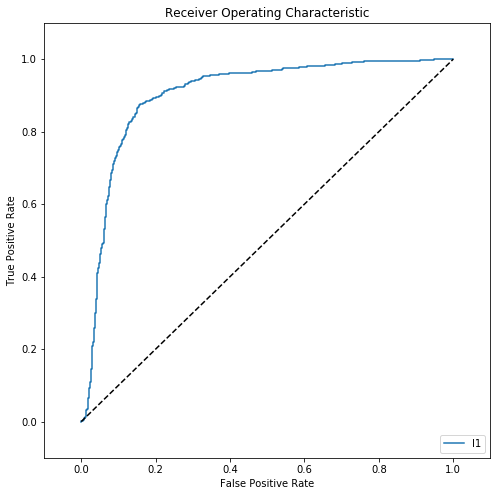

In [211]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [212]:
## Calculate AUC for Train set
print(roc_auc_score(y_train,train_pred))

0.7775223064060668


In [213]:
# accuracy
print(auc(fpr, tpr))

0.901540225401886


In [214]:
# finding the best parameters of logistic regression
model.best_estimator_

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [215]:
# applying model with best parameters
model = LogisticRegression(C=10, penalty = 'l2')
model.fit(x_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [216]:
# loading top featues in order
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in x.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
satisfaction
overachiever
missing_last_evaluation
underperformer
last_evaluation
filed_complaint
n_projects
salary_high
tenure
avg_monthly_hrs
salary_low
recently_promoted
unhappy
department_procurement
department_management
department_missing
department_engineering
department_admin
department_product
department_marketing
department_finance
department_IT
salary_medium
department_support
department_sales


### Random forest

In [217]:
#tunning the parameters
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]} 
 # applying gridsearchcv for intensive search across the parameter values for an estimator. 
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)

model.fit(x_train, y_train) #fitting the model

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=15, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [218]:
train_pred = model.predict(x_train) # Predict Train set results

In [219]:
test_pred = model.predict(x_test) # Predict Test set results

In [220]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(x_test)[:,1]

In [221]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.02, 0.  , 0.07, 0.01, 0.16, 0.01, 0.74, 0.99, 1.  , 0.  ])

In [223]:
# evaluation metrics
confusion_matrix(y_test, test_pred).T

array([[2129,   50],
       [  12,  623]], dtype=int64)

In [224]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

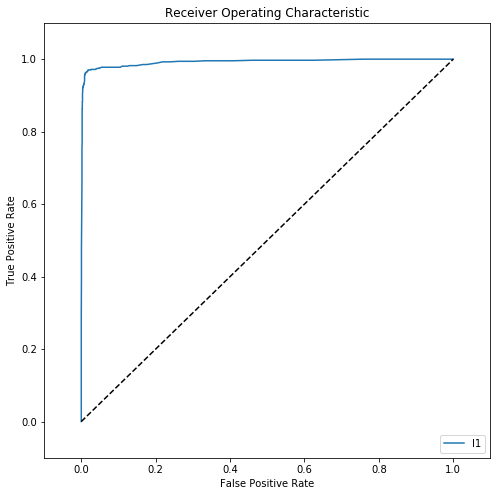

In [225]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [226]:
# Calculate AUC for Train set
roc_auc_score(y_train, train_pred)

1.0

In [227]:
# accuracy
print(auc(fpr, tpr))

0.9923172643631415


In [228]:
# applying model with best parameters
model.best_estimator_ 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [229]:
## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=2)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [230]:
# loading top featues in order
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in x.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
satisfaction
n_projects
tenure
avg_monthly_hrs
last_evaluation
overachiever
unhappy
underperformer
filed_complaint
salary_low
salary_high
missing_last_evaluation
department_engineering
department_sales
salary_medium
department_support
recently_promoted
department_IT
department_missing
department_management
department_finance
department_product
department_marketing
department_procurement
department_admin


### Note:
### The best model is Random forest as it has 99% accuracy as compared with logistic regression which hai approx 90% accuracy.